In a batch processing of data files, we want to automate peak finding and automate file identification in a folder resulting in a summary text file. The files are pair distribtuion files g(r) vs. r.  An example is shown below:


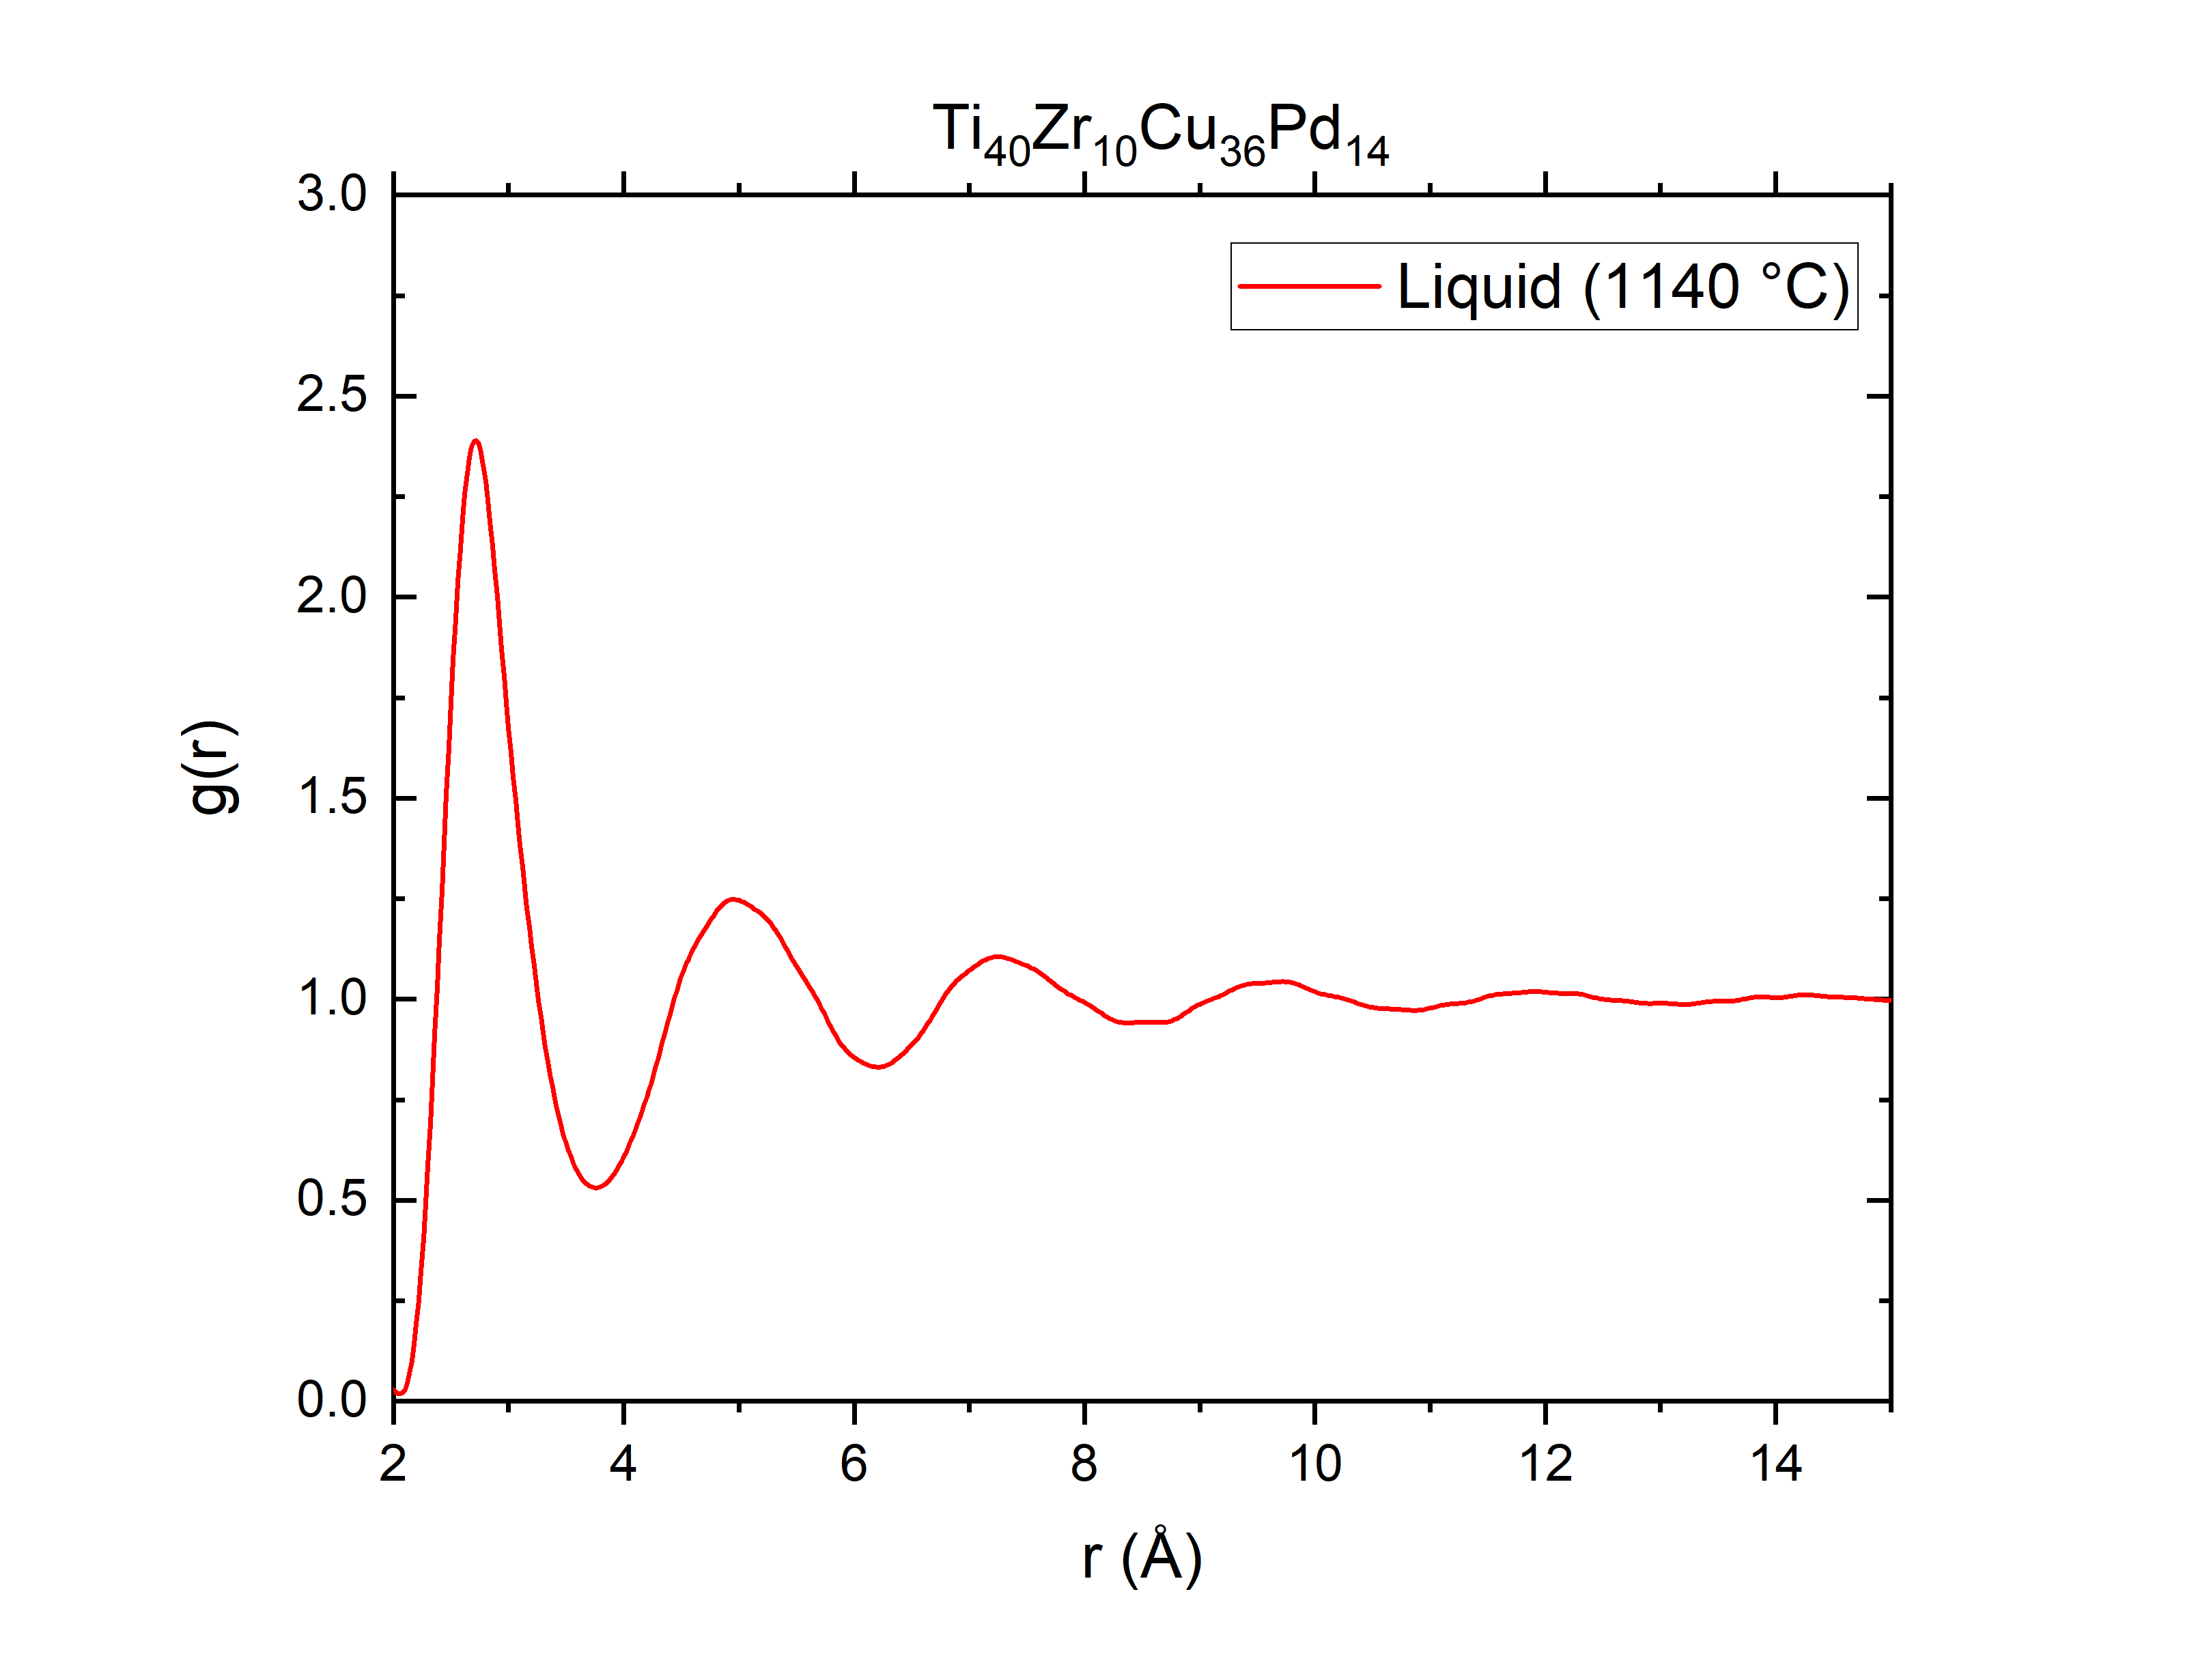



The g(r) files are tab separated with the format:

#Gmod = 0.998421

#rmin = 2.099999

##		

0.000000	NaN	NaN

0.002000	0.006325	0.045642

0.004000	0.006325	0.045633

.

.

.


Read ins are batch processed from a master file where the name, frame number, temperature, uncertainty and number density are provided.

The master files have the format:


    File	Frame	Avg. T (deg. C)	Unc. T (deg. C)	Number Density (1/ang^3)

STL16054_1fps_180f_slow_00023.ge2_15_15.S_sm.pdf.dat	15	986.2279907	1.090203746	0.064021805

STL16054_1fps_180f_slow_00023.ge2_20_20.S_sm.pdf.dat	16	984.6492859	0.961679837	0.064029406

.

.

.

We'll first define my_function which will process the file and output not only peak locations manually defining the bounds on the three peaks, but will also calculate coordination number.  The syntax dummy = line.split() is used to read the data line by line and construct and array dummy[] which can be used to extract information.

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#"""
#Modified from S. Bertrand Beta
#
#Defines my_function to read a file, associated frame number, Temperature and number density
#
#Returns [Frame_Number, Temperature, Density, gmax1, gmax2, gmax3, coord_num1, coord_num2, coord_num3]

#"""


# import the packages we need
from matplotlib import *
from pylab import *
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


def my_function(File, Frame_Number, Temperature, Density):
    delta_r = 0.002 
    p = Density
    
    g_column_list_total = []  # make complete gcolumn list
    r_column_list_total = []  # make complete rcolumn list
    g_column_list0 = []  # make gcolumn list in range
    r_column_list0 = []  # make rcolumn list in range
    g_column_list1 = []  # make gcolumn list in range
    r_column_list1 = []  # make rcolumn list in range
    g_column_list2 = []  # make gcolumn list in range
    r_column_list2 = []  # make rcolumn list in range
    g_column_list3 = []  # make gcolumn list in range
    r_column_list3 = []  # make rcolumn list in range
    r_column_list4 = []  # make rcolumn list in range
    g_column_list4 = []  # make gcolumn list in range
    r_column_list5 = []  # make rcolumn list in range
    g_column_list5 = []  # make gcolumn list in range
    r_column_list6 = []  # make rcolumn list in range
    g_column_list6 = []  # make gcolumn list in range
    g_column_list7 = []  # make gcolumn list in range
    r_column_list7 = []  # make rcolumn list in range
    rFile = open(File)  # open the new file (that I'm using)
    line_count = 0  # starting point for summation
    exp = 0  # starting point
    temp = 0  # starting point
    dummy = 0  # starting point
    for line in rFile:  # for lines in the new file:
        line_count = line_count + 1  # summation (proceed to next line)
        if line_count < 5:  # for lines before line 4 (header):
            dummy = line.split()  # split line into dummies by whitespace
            #print(dummy)
        else:  # for the rest of the lines:
            dummy = line.split()  # split line into dummies by whitespace
            g_column_list_total.append(dummy[1])  # add the 2nd word to gcolumn list
            r_column_list_total.append(dummy[0])  # add the 1st word to rcolumn list
            if float(dummy[0]) > 1.8 and float(dummy[0]) < 2.5:  # set range
                g_column_list0.append(dummy[1])  # add the 2nd word to gcolumn list
                r_column_list0.append(dummy[0])  # add the 1st word to rcolumn list
            if float(dummy[0]) > 3 and float(dummy[0]) < 4:  # set range
                g_column_list1.append(dummy[1])  # add the 2nd word to gcolumn list
                r_column_list1.append(dummy[0])  # add the 1st word to rcolumn list
            if float(dummy[0]) > 5.5 and float(dummy[0]) < 6.75:  # set range
                g_column_list2.append(dummy[1])  # add the 2nd word to gcolumn list
                r_column_list2.append(dummy[0])  # add the 1st word to rcolumn list
            if float(dummy[0]) > 7.5 and float(dummy[0]) < 9.5:  # set range
                g_column_list3.append(dummy[1])  # add the 2nd word to gcolumn list
                r_column_list3.append(dummy[0])  # add the 1st word to rcolumn list
            if float(dummy[0]) > 0 and float(dummy[0]) < 4.25:
                r_column_list4.append(dummy[0])  # add the 1st word to rcolumn list
                g_column_list4.append(dummy[1])  # add the 2nd word to gcolumn list
            if float(dummy[0]) > 4.25 and float(dummy[0]) < 6:
                r_column_list5.append(dummy[0])  # add the 1st word to rcolumn list
                g_column_list5.append(dummy[1])  # add the 2nd word to gcolumn list
            if float(dummy[0]) > 6 and float(dummy[0]) < 10:
                r_column_list6.append(dummy[0])  # add the 1st word to rcolumn list
                g_column_list6.append(dummy[1])  # add the 2nd word to gcolumn list
            if float(dummy[0]) > 0:
                r_column_list7.append(dummy[0])  # add the 1st word to rcolumn list
                g_column_list7.append(dummy[1])  # add the 2nd word to gcolumn list
    r1 = array(r_column_list1, float)  # create an array of r column
    g1 = array(g_column_list1, float)  # create an array of g column
    r2 = array(r_column_list2, float)  # create an array of r column
    g2 = array(g_column_list2, float)  # create an array of g column
    r3 = array(r_column_list3, float)  # create an array of r column
    g3 = array(g_column_list3, float)  # create an array of g column
    r4 = array(r_column_list4, float)  # create an array of r column
    g4 = array(g_column_list4, float)  # create an array of g column
    r5 = array(r_column_list5, float)  # create an array of r column
    g5 = array(g_column_list5, float)  # create an array of g column
    r6 = array(r_column_list6, float)  # create an array of r column
    g6 = array(g_column_list6, float)  # create an array of g column
    r7 = array(r_column_list7, float)  # create an array of r column
    g7 = array(g_column_list7, float)  # create an array of g column
    g = np.array(g_column_list_total, float)  # make complete gcolumn array
    r = np.array(r_column_list_total, float)  # make complete rcolumn array
    r0 = np.array(r_column_list0, float)  # create an array of r column in range
    g0 = np.array(g_column_list0, float)  # create an array of g(r) values in range
    r1 = np.array(r_column_list1, float)  # create an array of r column in range
    g1 = np.array(g_column_list1, float)  # create an array of g(r) values in range
    r2 = np.array(r_column_list2, float)  # create an array of r column in range
    g2 = np.array(g_column_list2, float)  # create an array of g(r) values in range
    r3 = np.array(r_column_list3, float)  # create an array of r column in range
    g3 = np.array(g_column_list3, float)  # create an array of g(r) values in range
    g_list = g.tolist()  # convert array to list
    r_list = r.tolist()  # convert array to list
    g_list0 = g0.tolist()  # convert array to list
    r_list0 = r0.tolist()  # convert array to list
    g_list1 = g1.tolist()  # convert array to list
    r_list1 = r1.tolist()  # convert array to list
    g_list2 = g2.tolist()  # convert array to list
    r_list2 = r2.tolist()  # convert array to list
    g_list3 = g3.tolist()  # convert array to list
    r_list3 = r3.tolist()  # convert array to list
    gmin0 = min(g0)  # identify min value in list
    gmin1 = min(g1)  # identify min value in list
    #gmax1 = max(g)
    gmin2 = min(g2)  # identify min value in list
    #gmax2 = max(g2)
    gmin3 = min(g3)  # identify min value in list
    #gmax3 = max(g3)
    gmin0_index = g_list0.index(gmin0)  # identify index of min value
    gmin1_index = g_list1.index(gmin1)  # identify index of min value
    gmin2_index = g_list2.index(gmin2)  # identify index of min value
    gmin3_index = g_list3.index(gmin3)  # identify index of min value
    r_lower1 = r_list0[gmin0_index]  # find r value with same index
    r_upper1 = r_list1[gmin1_index]  # find r value with same index
    r_lower2 = r_list1[gmin1_index]  # find r value with same index
    r_upper2 = r_list2[gmin2_index]  # find r value with same index
    r_lower3 = r_list2[gmin2_index]  # find r value with same index
    r_upper3 = r_list3[gmin3_index]  # find r value with same index
    r_lower_index1 = r_list.index(r_lower1)  # identify index of lower bound
    r_upper_index1 = r_list.index(r_upper1)  # identify index of upper bound
    r_lower_index2 = r_list.index(r_lower2)  # identify index of lower bound
    r_upper_index2 = r_list.index(r_upper2)  # identify index of upper bound
    r_lower_index3 = r_list.index(r_lower3)  # identify index of lower bound
    r_upper_index3 = r_list.index(r_upper3)  # identify index of upper bound


    # print r values for minimum g(r) values
    #print(r_lower1)
    #print(r_upper1)

    #print(r_lower2)
    #print(r_upper2)

    #print(r_lower3)
    #print(r_upper3)
    gmax1 = 0
    gmax2 = 0
    gmax3 = 0
    # calculate coordination numbers
    cn1 = []  # create list of terms to sum
    for i in range(r_lower_index1 + 1, r_upper_index1 + 1):  # define range for summation
        cn_i1 = 4 * pi * p * r[i]**2 * g[i] * delta_r  # run equation for each term
        cn1.append(cn_i1)  # append eqn output for each term to list
        if (g[i]>gmax1):
            gmax1 = g[i]
    coord_num1 = sum(cn1)  # sum elements of list
    #print(coord_num1)  # print coord #

    cn2 = []  # create list of terms to sum
    for i in range(r_lower_index2, r_upper_index2):  # define range for summation
        cn_i2 = 4 * pi * p * r[i]**2 * g[i] * delta_r  # run equation for each term
        cn2.append(cn_i2)  # append eqn output for each term to list
        if (g[i]>gmax2):
            gmax2=g[i]
    coord_num2 = sum(cn2)  # sum elements of list
    #print(coord_num2)  # print coord #

    cn3 = []  # create list of terms to sum
    for i in range(r_lower_index3, r_upper_index3):  # define range for summation
        cn_i3 = 4 * pi * p * r[i]**2 * g[i] * delta_r  # run equation for each term
        cn3.append(cn_i3)  # append eqn output for each term to list
        if (g[i]>gmax3):
            gmax3=g[i]
    coord_num3 = sum(cn3)  # sum elements of list
    #print(coord_num3)  # print coord #
    rFile.close()
    
    
    return [Frame_Number, Temperature, Density, gmax1, gmax2, gmax3, coord_num1, coord_num2, coord_num3]



Now, we can call the function my_function outputting to a .txt file for analysis the outputs from the function but automates analysis for multiple files in the folder.  

In [ ]:
#This version reading in from the file with the file names, temperatures, and density in preparation for the g(r) analysis

#working to define the function to conduct the analysis from Bertrand on coordination number

from math import *
from numpy import *
from datetime import *
import os
from mega_analysis2_definitions_06142023_testing import *
Roottitle = 'STL16054_gr1_r1_testing'
title = Roottitle + '.txt'
today = date.today()
Dat_Folder = 'STL16054 .dat files'
PWD = os.getcwd()
outTitle= Roottitle + 'Extract_'+str(today)+'.txt'
target = open(outTitle, 'w')
rFile = open(title)
line_count = 0
File = 0
Frame_Number = 0
Temperature = 0
Density = 0 
#number density information

target.write('File_Name' + ' ' + 'Frame' + ' ' + 'Temperature(C)'+ ' ' + 'Density' + ' ' + 'gmax1'+ ' ' + 'gmax2'+ ' ' 'gmax3'+ ' ' 'CN1'+ ' ' 'CN3'+ ' ' 'CN3'+ ' ' "\n")
for line in rFile:
    line_count = line_count +1
    #print('Ok')
    if (line_count>1):
        dummy = line.split()
        File = (dummy[0])
        Frame_Number=(dummy[1])
        Temperature = (dummy[2])
        Density = float(dummy[4])
        #print(pi)
        #print(dummy[0])
        #print(dummy[1])
        #print(dummy[2])
        #print(dummy[3])
       # print(dummy[4])
        a=my_function(PWD + '\\' + Dat_Folder+'\\'+File,Frame_Number, Temperature, Density)
        target.write(dummy[0] + ' ' + str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' + str(a[3]) + ' '+ str(a[4]) + ' ' + str(a[5]) + ' ' + str(a[6]) + ' ' + str(a[7]) + ' ' + str(a[8]) +"\n")
        print(a)
        
        
target.close()
